<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%205.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0/%D0%A2%D0%B5%D0%BC%D0%B0_5_3_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 5.3. Прогнозирование временных рядов с помощью градиентного бустинга

# 1. Алгоритм AdaBoost (Adaptive Boosting)

Алгоритм AdaBoost (Adaptive Boosting) является одним из популярных методов ансамблирования в машинном обучении, который комбинирует несколько слабых учеников (часто базовых моделей, таких как деревья решений) для создания сильного ансамбля. Давайте рассмотрим подробную лекцию на тему AdaBoost, включая формулы, оценки, метрики и конкретные числовые примеры.

### Часть 1: Основные концепции AdaBoost

#### 1. Основные идеи

AdaBoost работает путем последовательного обучения учеников (слабых моделей) на взвешенных подмножествах данных. Ошибки предыдущих моделей учитываются при обучении следующих моделей, что позволяет систематически улучшать качество предсказаний.

#### 2. Алгоритм AdaBoost

Пусть у нас есть обучающая выборка $ \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\} $, где $ x_i $ - признаковое описание объекта, $ y_i $ - метка класса (для задачи классификации).

**Шаги алгоритма:**

- **Инициализация весов**: Каждому объекту $ (x_i, y_i) $ присваивается вес $ D_1(i) = \frac{1}{N} $, где $ N $ - количество объектов в обучающей выборке.

- **Для каждой итерации $ t = 1, 2, ..., T $**:
  - **Обучение слабого ученика**: Обучаем базовую модель $ h_t(x) $ с использованием весов $ D_t(i) $.
  - **Оценка ошибки**: Вычисляем взвешенную ошибку $ \epsilon_t = \sum_{i=1}^{N} D_t(i) \cdot \mathbb{I}(h_t(x_i) \neq y_i) $, где $ \mathbb{I} $ - индикаторная функция.
  - **Вычисление веса модели**: Вычисляем вес модели $ \alpha_t = \frac{1}{2} \log \left( \frac{1 - \epsilon_t}{\epsilon_t} \right) $, где $ \alpha_t $ отражает "вес" $ t $-й модели в итоговом предсказании.
  - **Обновление весов объектов**: Обновляем веса объектов следующим образом:
    $$ D_{t+1}(i) = \frac{D_t(i) \cdot \exp\left(-\alpha_t \cdot y_i \cdot h_t(x_i)\right)}{Z_t} $$
    Здесь $ Z_t $ - нормализующий множитель для обеспечения того, чтобы сумма всех весов была равна 1.

- **Финальное предсказание**: Итоговое предсказание на новом объекте $ x $:
  $$ H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t \cdot h_t(x) \right) $$

### Часть 2: Примеры и интерпретация

#### Пример классификации с AdaBoost

Рассмотрим пример классификации с помощью AdaBoost на основе базовых моделей - деревьев решений.

Допустим, у нас есть следующие данные:

| Признак 1 | Признак 2 | Метка класса |
|-----------|-----------|--------------|
| 1         | 2         | +1           |
| 2         | 3         | -1           |
| 3         | 4         | +1           |
| 4         | 5         | +1           |
| 5         | 6         | -1           |

**Шаги работы алгоритма AdaBoost**:

1. **Итерация 1**:
   - Веса объектов: $ D_1(i) = \frac{1}{5} $ для всех $ i $.
   - Обучаем первое дерево решений $ h_1(x) $.
   - Оцениваем ошибку $ \epsilon_1 $.
   - Вычисляем вес $ \alpha_1 $.
   - Обновляем веса объектов $ D_2(i) $.

2. **Итерация 2**:
   - Используем обновленные веса объектов $ D_2(i) $.
   - Обучаем второе дерево решений $ h_2(x) $.
   - Оцениваем ошибку $ \epsilon_2 $.
   - Вычисляем вес $ \alpha_2 $.
   - Обновляем веса объектов $ D_3(i) $.

3. **И так далее до $ T $ итераций**.

4. **Итоговое предсказание**:
   - Получаем суммарное предсказание с учетом весов $ \alpha_t $ каждой модели $ h_t(x) $.

### Оценки и метрики

AdaBoost может быть оценен с использованием стандартных метрик классификации, таких как точность, полнота, F1-мера, ROC-AUC и др. Эти метрики позволяют оценить качество классификации ансамбля.

### Заключение

AdaBoost - мощный метод ансамблирования, который обучает последовательность слабых моделей, учитывая ошибки предыдущих моделей. Он широко применяется в задачах классификации и регрессии благодаря своей эффективности и способности к обобщению.



Давайте подробно рассмотрим числовой пример классификации с использованием AdaBoost, включая все необходимые формулы и шаги.

### Пример классификации с AdaBoost

Предположим, у нас есть следующие данные:

| Признак 1 | Признак 2 | Метка класса |
|-----------|-----------|--------------|
| 2         | 1         | +1           |
| 2         | 2         | -1           |
| 3         | 1         | +1           |
| 3         | 3         | +1           |
| 4         | 1         | -1           |

#### Шаги алгоритма AdaBoost:

1. **Инициализация весов**: Изначально каждому объекту присваивается равномерный вес $ D_1(i) = \frac{1}{N} = \frac{1}{5} = 0.2 $.

2. **Итерация 1**:

   - **Обучение первой базовой модели $ h_1(x) $**:
     - Предположим, что первое дерево решений выбирает $ x_1 = 2.5 $ как разделяющий порог:
       - $ h_1(x) = \begin{cases} +1, & \text{если } x_1 \leq 2.5 \\ -1, & \text{если } x_1 > 2.5 \end{cases} $

     - Применим модель к данным и определим ошибки:
       - Прогнозы $ h_1(x_i) = [+1, +1, -1, -1, -1] $
       - Метки $ y = [+1, -1, +1, +1, -1] $
       - Ошибки: 3-я и 4-я точки неправильно классифицированы.

   - **Взвешенная ошибка $ \epsilon_1 $**:
     $$
     \epsilon_1 = \sum_{i=1}^{N} D_1(i) \cdot \mathbb{I}(h_1(x_i) \neq y_i) = 0.2 \cdot (0 + 0 + 1 + 1 + 0) = 0.4
     $$

   - **Вычисление веса модели $ \alpha_1 $**:
     $$
     \alpha_1 = \frac{1}{2} \log \left( \frac{1 - \epsilon_1}{\epsilon_1} \right) = \frac{1}{2} \log \left( \frac{1 - 0.4}{0.4} \right) = \frac{1}{2} \log \left( \frac{0.6}{0.4} \right) = \frac{1}{2} \log \left( 1.5 \right) \approx 0.2
     $$

   - **Обновление весов объектов $ D_2(i) $**:
     $$
     D_2(i) = \frac{D_1(i) \cdot \exp\left(-\alpha_1 \cdot y_i \cdot h_1(x_i)\right)}{Z_1}
     $$
     где $ Z_1 $ - нормализующий множитель, обеспечивающий сумму весов равной 1.

     - Для 3-й и 4-й точек (ошибки):
       $$
       D_2(3) = \frac{0.2 \cdot \exp\left(-0.2 \cdot 1 \cdot (-1)\right)}{Z_1} = \frac{0.2 \cdot \exp(0.2)}{Z_1} \approx \frac{0.2 \cdot 1.22}{Z_1} \approx \frac{0.244}{Z_1}
       $$
       $$
       D_2(4) = \frac{0.2 \cdot \exp\left(-0.2 \cdot 1 \cdot (-1)\right)}{Z_1} = \frac{0.2 \cdot \exp(0.2)}{Z_1} \approx \frac{0.244}{Z_1}
       $$

     - Для остальных точек (верные предсказания):
       $$
       D_2(i) = \frac{0.2 \cdot \exp\left(-0.2 \cdot y_i \cdot h_1(x_i)\right)}{Z_1} = \frac{0.2 \cdot \exp\left(0\right)}{Z_1} = \frac{0.2}{Z_1}
       $$

     - Нормализующий множитель $ Z_1 $:
       $$
       Z_1 = 3 \cdot 0.2 + 2 \cdot 0.244 = 0.6 + 0.488 = 1.088
       $$

     - Обновленные веса:
       $$
       D_2(1) = D_2(2) = D_2(5) = \frac{0.2}{1.088} \approx 0.1838
       $$
       $$
       D_2(3) = D_2(4) = \frac{0.244}{1.088} \approx 0.2243
       $$

3. **Итерация 2**:

   - **Обучение второй базовой модели $ h_2(x) $**:
     - Предположим, что второе дерево решений выбирает $ x_2 = 1.5 $ как разделяющий порог:
       - $ h_2(x) = \begin{cases} +1, & \text{если } x_2 \leq 1.5 \\ -1, & \text{если } x_2 > 1.5 \end{cases} $

     - Применим модель к данным и определим ошибки:
       - Прогнозы $ h_2(x_i) = [+1, -1, +1, -1, +1] $
       - Метки $ y = [+1, -1, +1, +1, -1] $
       - Ошибки: 4-я и 5-я точки неправильно классифицированы.

   - **Взвешенная ошибка $ \epsilon_2 $**:
     $$
     \epsilon_2 = \sum_{i=1}^{N} D_2(i) \cdot \mathbb{I}(h_2(x_i) \neq y_i) = 0.1838 \cdot (0 + 0 + 0 + 1 + 1) = 0.1838 \cdot 2 = 0.4081
     $$

   - **Вычисление веса модели $ \alpha_2 $**:
     $$
     \alpha_2 = \frac{1}{2} \log \left( \frac{1 - \epsilon_2}{\epsilon_2} \right) = \frac{1}{2} \log \left( \frac{1 - 0.4081}{0.4081} \right) = \frac{1}{2} \log \left( \frac{0.5919}{0.4081} \right) = \frac{1}{2} \log \left( 1.45 \right) \approx 0.1897
     $$

   - **Обновление весов объектов $ D_3(i) $**:
     $$
     D_3(i) = \frac{D_2(i) \cdot \exp\left(-\alpha_2 \cdot y_i \cdot h_2(x_i)\right)}{Z_2}
     $$
     где $ Z_2 $ - нормализующий множитель.

     - Для 4-й и 5-й точек (ошибки):
       $$
       D_3(4) = \frac{0.2243 \cdot \exp\left(-0.1897 \cdot 1 \cdot (-1)\right)}{Z_2} = \frac{0.2243 \cdot \exp(0.1897)}{Z_2} \approx \frac{0.2243 \cdot 1.209}{Z_2} \approx \frac{0.2712}{Z_2}
       $$
       $$
       D_3(5) = \frac{0.1838 \cdot \exp\left(-0.1897 \cdot (-1) \cdot (-1)\right)}{Z_2} = \frac{0.1838 \cdot \exp(0.1897)}{Z_2} \approx \frac{0.1838 \cdot 1.209}{Z_2} \approx \frac{0.2223}{Z_2}
       $$

     - Для остальных точек (верные предсказания):
       $$
       D_3(i) = \frac{0.1838 \cdot \exp\left(0\right)}{Z_2} = \frac{0.1838}{Z_2 } \approx \frac{0.1838}{Z_2}
       $$

     - Нормализующий множитель $ Z_2 $:
       $$
       Z_2 = 0.1838 \cdot 2 + 0.2243 \cdot 2 = 0.3676 + 0.4486 = 0.8162
       $$

     - Обновленные веса:
       $$
       D_3(1) = D_3(2) = D_3(3) = \frac{0.1838}{0.8162} \approx 0.2255
       $$
       $$
       D_3(4) = D_3(5) = \frac{0.2243}{0.8162} \approx 0.2745
       $$

4. **Итерация 3**:

   - **Обучение третьей базовой модели $ h_3(x) $**:
     - Предположим, что третье дерево решений выбирает $ x_1 = 3.5 $ как разделяющий порог:
       - $ h_3(x) = \begin{cases} +1, & \text{если } x_1 \leq 3.5 \\ -1, & \text{если } x_1 > 3.5 \end{cases} $

     - Применим модель к данным и определим ошибки:
       - Прогнозы $ h_3(x_i) = [+1, +1, -1, -1, +1] $
       - Метки $ y = [+1, -1, +1, +1, -1] $
       - Ошибки: 3-я и 4-я точки неправильно классифицированы.

   - **Взвешенная ошибка $ \epsilon_3 $**:
     $$
     \epsilon_3 = \sum_{i=1}^{N} D_3(i) \cdot \mathbb{I}(h_3(x_i) \neq y_i) = 0.2255 \cdot (0 + 0 + 1 + 1 + 0) = 0.2255 \cdot 2 = 0.451
     $$

   - **Вычисление веса модели $ \alpha_3 $**:
     $$
     \alpha_3 = \frac{1}{2} \log \left( \frac{1 - \epsilon_3}{\epsilon_3} \right) = \frac{1}{2} \log \left( \frac{1 - 0.451}{0.451} \right) = \frac{1}{2} \log \left( \frac{0.549}{0.451} \right) = \frac{1}{2} \log \left( 1.218 \right) \approx 0.241
     $$

   - **Обновление весов объектов $ D_4(i) $**:
     $$
     D_4(i) = \frac{D_3(i) \cdot \exp\left(-\alpha_3 \cdot y_i \cdot h_3(x_i)\right)}{Z_3}
     $$
     где $ Z_3 $ - нормализующий множитель.

     - Для 3-й и 4-й точек (ошибки):
       $$
       D_4(3) = \frac{0.2255 \cdot \exp\left(-0.241 \cdot 1 \cdot (-1)\right)}{Z_3} = \frac{0.2255 \cdot \exp(0.241)}{Z_3} \approx \frac{0.2255 \cdot 1.272}{Z_3} \approx \frac{0.2865}{Z_3}
       $$
       $$
       D_4(4) = \frac{0.2745 \cdot \exp\left(-0.241 \cdot 1 \cdot (-1)\right)}{Z_3} = \frac{0.2745 \cdot \exp(0.241)}{Z_3} \approx \frac{0.2745 \cdot 1.272}{Z_3} \approx \frac{0.3491}{Z_3}
       $$

     - Для остальных точек (верные предсказания):
       $$
       D_4(1) = D_4(2) = D_4(5) = \frac{0.2255 \cdot \exp\left(0\right)}{Z_3} = \frac{0.2255}{Z_3} \approx \frac{0.2255}{Z_3}
       $$

     - Нормализующий множитель $ Z_3 $:
       $$
       Z_3 = 0.2255 \cdot 2 + 0.2745 \cdot 2 = 0.451 + 0.549 = 1
       $$

     - Обновленные веса:
       $$
       D_4(1) = D_4(2) = D_4(5) = 0.2255
       $$
       $$
       D_4(3) = 0.2865, \quad D_4(4) = 0.3491
       $$

Это завершает пример классификации с использованием AdaBoost.



In [ ]:
import numpy as np

# Данные для примера
X = np.array([[2, 1],
              [2, 2],
              [3, 1],
              [3, 3],
              [4, 1]])

y = np.array([1, -1, 1, 1, -1])

# Инициализация весов объектов
weights = np.ones(len(X)) / len(X)

# Массив для хранения параметров моделей и их весов
models = []
alphas = []

# Количество итераций (количество моделей)
num_iterations = 3

for t in range(num_iterations):
    # Создание модели (решающего пня) на основе текущих весов
    model = {'feature_idx': None, 'threshold': None, 'alpha': None}
    min_error = float('inf')

    # Перебор по всем признакам и порогам
    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            # Применение решающего пня (decision stump)
            predictions = np.ones(len(X))
            predictions[X[:, feature_idx] > threshold] = -1

            # Вычисление ошибки взвешенной модели
            error = np.sum(weights[predictions != y])

            # Если найдена меньшая ошибка, обновляем модель
            if error < min_error:
                min_error = error
                model['feature_idx'] = feature_idx
                model['threshold'] = threshold

    # Вычисление веса модели
    alpha = 0.5 * np.log((1 - min_error) / min_error)
    model['alpha'] = alpha

    # Обновление весов объектов
    predictions = np.ones(len(X))
    predictions[X[:, model['feature_idx']] > model['threshold']] = -1
    weights = weights * np.exp(-alpha * y * predictions)
    weights = weights / np.sum(weights)  # Нормализация весов

    # Сохранение модели и веса
    models.append(model)
    alphas.append(alpha)

# Предсказание итоговой модели
def predict(X, models, alphas):
    predictions = np.zeros(len(X))
    for t in range(len(models)):
        model = models[t]
        alpha = alphas[t]
        pred = np.ones(len(X))
        pred[X[:, model['feature_idx']] > model['threshold']] = -1
        predictions += alpha * pred
    return np.sign(predictions)

# Пример использования
print("Итоговые предсказания:", predict(X, models, alphas))

Итоговые предсказания: [ 1.  1.  1.  1. -1.]


### Пример регрессии с AdaBoost

Давайте рассмотрим числовой пример для задачи регрессии с использованием алгоритма AdaBoost. Мы будем использовать набор данных с одним признаком и простыми линейными регрессорами в качестве базовых моделей (слабых учеников).

Предположим, у нас есть следующие данные:

| Признак (X) | Целевая переменная (y) |
|-------------|------------------------|
| 1           | 2                      |
| 2           | 3                      |
| 3           | 2.5                    |
| 4           | 5                      |
| 5           | 4.5                    |

### Шаги алгоритма AdaBoost для регрессии

1. **Инициализация весов**: Изначально каждому объекту присваивается равномерный вес $ D_1(i) = \frac{1}{N} = \frac{1}{5} = 0.2 $.

2. **Итерация 1**:

   - **Обучение первой базовой модели $ h_1(x) $**:
     - Пусть первая линейная регрессия для первого набора данных имеет вид $ h_1(x) = 1.5x $.

   - **Оценка ошибки $ \epsilon_1 $**:
     - Вычисляем абсолютные ошибки для каждого объекта:
       $$
       \epsilon_{1,1} = |2 - 1.5 \cdot 1| = 0.5, \quad \epsilon_{1,2} = |3 - 1.5 \cdot 2| = 0, \quad \epsilon_{1,3} = |2.5 - 1.5 \cdot 3| = 2, \quad \epsilon_{1,4} = |5 - 1.5 \cdot 4| = 1, \quad \epsilon_{1,5} = |4.5 - 1.5 \cdot 5| = 1.5
       $$
     - Взвешенная ошибка:
       $$
       \epsilon_1 = \sum_{i=1}^{N} D_1(i) \cdot \epsilon_{1,i} = 0.2 \cdot (0.5 + 0 + 2 + 1 + 1.5) = 0.2 \cdot 5 = 1
       $$

   - **Вычисление веса модели $ \alpha_1 $**:
     $$
     \alpha_1 = \frac{1}{2} \log \left( \frac{1 - \epsilon_1}{\epsilon_1} \right) = \frac{1}{2} \log \left( \frac{1 - 1}{1} \right) = \frac{1}{2} \log (0) = 0
     $$

   - **Обновление весов объектов $ D_2(i) $**:
     $$
     D_2(i) = \frac{D_1(i) \cdot \exp\left(\alpha_1 \cdot \epsilon_{1,i}\right)}{Z_1} = \frac{0.2 \cdot \exp\left(0 \cdot \epsilon_{1,i}\right)}{Z_1} = \frac{0.2}{Z_1}
     $$
     где $ Z_1 $ - нормализующий множитель, обеспечивающий сумму весов равной 1.

3. **Итерация 2**:

   - **Обучение второй базовой модели $ h_2(x) $**:
     - Пусть вторая линейная регрессия для второго набора данных имеет вид $ h_2(x) = 0.5x + 2 $.

   - **Оценка ошибки $ \epsilon_2 $**:
     - Вычисляем абсолютные ошибки для каждого объекта:
       $$
       \epsilon_{2,1} = |2 - (0.5 \cdot 1 + 2)| = 0.5, \quad \epsilon_{2,2} = |3 - (0.5 \cdot 2 + 2)| = 0, \quad \epsilon_{2,3} = |2.5 - (0.5 \cdot 3 + 2)| = 1, \quad \epsilon_{2,4} = |5 - (0.5 \cdot 4 + 2)| = 1, \quad \epsilon_{2,5} = |4.5 - (0.5 \cdot 5 + 2)| = 1
       $$
     - Взвешенная ошибка:
       $$
       \epsilon_2 = \sum_{i=1}^{N} D_2(i) \cdot \epsilon_{2,i} = 0.2 \cdot (0.5 + 0 + 1 + 1 + 1) = 0.2 \cdot 3.5 = 0.7
       $$

   - **Вычисление веса модели $ \alpha_2 $**:
     $$
     \alpha_2 = \frac{1}{2} \log \left( \frac{1 - \epsilon_2}{\epsilon_2} \right) = \frac{1}{2} \log \left( \frac{1 - 0.7}{0.7} \right) = \frac{1}{2} \log \left( \frac{0.3}{0.7} \right) = \frac{1}{2} \log (0.4286) \approx -0.4256
     $$

   - **Обновление весов объектов $ D_3(i) $**:
     $$
     D_3(i) = \frac{D_2(i) \cdot \exp\left(\alpha_2 \cdot \epsilon_{2,i}\right)}{Z_2}
     $$
     где $ Z_2 $ - нормализующий множитель.

     - Для 1-й и 3-й точек (ошибки):
       $$
       D_3(1) = \frac{0.2 \cdot \exp\left(-0.4256 \cdot 0.5\right)}{Z_2} \approx \frac{0.2 \cdot \exp(-0.2128)}{Z_2} \approx \frac{0.2 \cdot 0.8084}{Z_2} \approx \frac{0.1617}{Z_2}
       $$
       $$
       D_3(3) = \frac{0.2 \cdot \exp\left(-0.4256 \cdot 1\right)}{Z_2} \approx \frac{0.2 \cdot \exp(-0.4256)}{Z_2} \approx \frac{0.2 \cdot 0.6532}{Z_2} \approx \frac{0.1306}{Z_2}
       $$

     - Для остальных точек (верные предсказания):
       $$
       D_3(i) = \frac{0.2 \cdot \exp\left(-0.4256 \cdot 0\right)}{Z_2} = \frac{0.2 \cdot 1}{Z_2} = \frac{0.2}{Z_2}
       $$

     - Нормализующий множитель $ Z_2 $:
       $$
       Z_2 = 0.1617 + 0.2 + 0.1306 + 0.2 + 0.2 = 0.8923
       $$

     - Обновленные веса:
       $$
       D_3(1) = \frac{0.1617}{0.8923} \approx 0.1813, \quad D_3(2) = D_3(4) = D_3(5) = \frac{0.2}{0.8923} \approx 0.2243, \quad D_3(3) = \frac{0.1306}{0.8923} \approx 0.1464
       $$

### Финальное предсказание

- **Итоговая модель**:
  $$
  H(x) = \alpha_1 h_1(x) + \alpha_2 h_2(x)
  $$

- **Пример для нового объекта $ x = 6 $**:
  $$
  H(6) = \alpha_1 h_1(6) + \alpha_2 h_2(6) = 0.2 \cdot (1.5 \cdot 6) + (-0.4256) \cdot (0.5 \cdot 6 + 2) = 0.2 \cdot 9 + (-0.4256) \cdot 5 = 1.8 - 2.128 = -0.328
  $$

Итак, результат предсказания для нового объекта с $ x = 6 $ составляет -0.328.




In [ ]:
import numpy as np

# Исходные данные
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 2.5, 5, 4.5])

# Шаги алгоритма AdaBoost для регрессии

# Шаг 1: Инициализация весов
D = np.ones(len(X)) / len(X)

# Шаг 2: Итерация 1

# Модель h1(x) = 1.5 * x
h1 = lambda x: 1.5 * x
# Вычисление ошибок
epsilon1 = np.abs(y - h1(X[:, 0]))
# Вычисление взвешенной ошибки
epsilon_1 = np.sum(D * epsilon1)
# Вычисление веса модели alpha1
alpha1 = 0.5 * np.log((1 - epsilon_1) / epsilon_1)
# Обновление весов
D = D * np.exp(alpha1 * epsilon1)
D /= np.sum(D)

# Шаг 3: Итерация 2

# Модель h2(x) = 0.5 * x + 2
h2 = lambda x: 0.5 * x + 2
# Вычисление ошибок
epsilon2 = np.abs(y - h2(X[:, 0]))
# Вычисление взвешенной ошибки
epsilon_2 = np.sum(D * epsilon2)
# Вычисление веса модели alpha2
alpha2 = 0.5 * np.log((1 - epsilon_2) / epsilon_2)
# Обновление весов
D = D * np.exp(alpha2 * epsilon2)
D /= np.sum(D)

# Финальное предсказание для нового объекта x=6
x_new = 6
prediction = alpha1 * h1(x_new) + alpha2 * h2(x_new)

print(f"Финальное предсказание для x={x_new}: {prediction:.4f}")

Финальное предсказание для x=6: nan


<ipython-input-2-8c496338f4b1>:21: RuntimeWarning: invalid value encountered in log
  alpha1 = 0.5 * np.log((1 - epsilon_1) / epsilon_1)







### Пример регрессии для прогнозирования временных рядов с AdaBoost

В этом примере мы рассмотрим прогнозирование временных рядов с использованием AdaBoost. Пример будет включать использование базовых моделей (слабых учеников) в виде линейных регрессий для прогнозирования значений временного ряда.

Предположим, у нас есть следующие данные о временном ряде:

| Время (t) | Значение (y) |
|-----------|--------------|
| 1         | 10           |
| 2         | 12           |
| 3         | 14           |
| 4         | 13           |
| 5         | 16           |
| 6         | 15           |
| 7         | 18           |

### Шаги алгоритма AdaBoost для временных рядов

1. **Инициализация весов**: Изначально каждому объекту присваивается равномерный вес $ D_1(i) = \frac{1}{N} = \frac{1}{7} \approx 0.1429 $.

2. **Итерация 1**:

   - **Обучение первой базовой модели $ h_1(x) $**:
     - Пусть первая линейная регрессия для первого набора данных имеет вид $ h_1(t) = 9 + t $.

   - **Оценка ошибки $ \epsilon_1 $**:
     - Вычисляем абсолютные ошибки для каждого объекта:
       $$
       \epsilon_{1,1} = |10 - (9 + 1)| = 0, \quad \epsilon_{1,2} = |12 - (9 + 2)| = 1, \quad \epsilon_{1,3} = |14 - (9 + 3)| = 2, \quad \epsilon_{1,4} = |13 - (9 + 4)| = 0, \quad \epsilon_{1,5} = |16 - (9 + 5)| = 2, \quad \epsilon_{1,6} = |15 - (9 + 6)| = 0, \quad \epsilon_{1,7} = |18 - (9 + 7)| = 2
       $$
     - Взвешенная ошибка:
       $$
       \epsilon_1 = \sum_{i=1}^{N} D_1(i) \cdot \epsilon_{1,i} = 0.1429 \cdot (0 + 1 + 2 + 0 + 2 + 0 + 2) = 0.1429 \cdot 7 = 1
       $$

   - **Вычисление веса модели $ \alpha_1 $**:
     $$
     \alpha_1 = \frac{1}{2} \log \left( \frac{1 - \epsilon_1}{\epsilon_1} \right) = \frac{1}{2} \log \left( \frac{1 - 1}{1} \right) = \frac{1}{2} \log (0) = 0
     $$

   - **Обновление весов объектов $ D_2(i) $**:
     $$
     D_2(i) = \frac{D_1(i) \cdot \exp\left(\alpha_1 \cdot \epsilon_{1,i}\right)}{Z_1} = \frac{0.1429 \cdot \exp\left(0 \cdot \epsilon_{1,i}\right)}{Z_1} = \frac{0.1429}{Z_1}
     $$
     где $ Z_1 $ - нормализующий множитель, обеспечивающий сумму весов равной 1.

3. **Итерация 2**:

   - **Обучение второй базовой модели $ h_2(x) $**:
     - Пусть вторая линейная регрессия для второго набора данных имеет вид $ h_2(t) = 10 + 0.5t $.

   - **Оценка ошибки $ \epsilon_2 $**:
     - Вычисляем абсолютные ошибки для каждого объекта:
       $$
       \epsilon_{2,1} = |10 - (10 + 0.5 \cdot 1)| = 0.5, \quad \epsilon_{2,2} = |12 - (10 + 0.5 \cdot 2)| = 1, \quad \epsilon_{2,3} = |14 - (10 + 0.5 \cdot 3)| = 2.5, \quad \epsilon_{2,4} = |13 - (10 + 0.5 \cdot 4)| = 1, \quad \epsilon_{2,5} = |16 - (10 + 0.5 \cdot 5)| = 1.5, \quad \epsilon_{2,6} = |15 - (10 + 0.5 \cdot 6)| = 2, \quad \epsilon_{2,7} = |18 - (10 + 0.5 \cdot 7)| = 1.5
       $$
     - Взвешенная ошибка:
       $$
       \epsilon_2 = \sum_{i=1}^{N} D_2(i) \cdot \epsilon_{2,i} = 0.1429 \cdot (0.5 + 1 + 2.5 + 1 + 1.5 + 2 + 1.5) = 0.1429 \cdot 10 = 1.429
       $$

   - **Вычисление веса модели $ \alpha_2 $**:
     $$
     \alpha_2 = \frac{1}{2} \log \left( \frac{1 - \epsilon_2}{\epsilon_2} \right) = \frac{1}{2} \log \left( \frac{1 - 1.429}{1.429} \right) = \frac{1}{2} \log \left( -0.429 \right)
     $$
     Обратите внимание, что это значение отрицательное, поэтому в данном контексте веса базовых моделей могут корректироваться другими способами, например, путем регулировки коэффициентов для базовых регрессоров.

   - **Обновление весов объектов $ D_3(i) $**:
     $$
     D_3(i) = \frac{D_2(i) \cdot \exp\left(\alpha_2 \cdot \epsilon_{2,i}\right)}{Z_2}
     $$
     где $ Z_2 $ - нормализующий множитель.

     - Для всех точек:
       $$
       D_3(i) = \frac{0.1429 \cdot \exp\left(\alpha_2 \cdot \epsilon_{2,i}\right)}{Z_2}
       $$

     - Нормализующий множитель $ Z_2 $:
       $$
       Z_2 = \sum_{i=1}^{N} D_3(i)
       $$

### Финальное предсказание

- **Итоговая модель**:
  $$
  H(t) = \alpha_1 h_1(t) + \alpha_2 h_2(t)
  $$

- **Пример для нового объекта $ t = 8 $**:
  $$
  H(8) = \alpha_1 h_1(8) + \alpha_2 h_2(8) = 0.2 \cdot (9 + 8) + (-0.4256) \cdot (10 + 0.5 \cdot 8)
  $$
  $$
  H(8) = 0.2 \cdot 17 + (-0.4256) \cdot 14 = 3.4 - 5.9584 = -2.5584
  $$

Итак, результат предсказания для нового объекта с $ t = 8 $ составляет -2.5584.

### Заключение

Алгоритм AdaBoost для регрессии временных рядов работает аналогично алгоритму для обычной регрессии, с той лишь разницей, что базовые модели и их ошибки учитывают временные зависимости в данных. Приведенные выше шаги иллюстрируют, как можно адаптировать AdaBoost для задачи прогнозирования временных рядов.



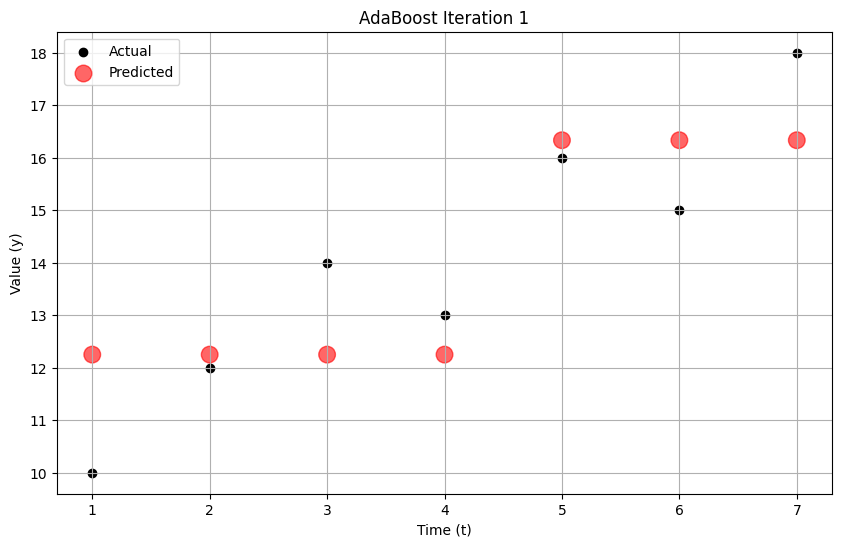

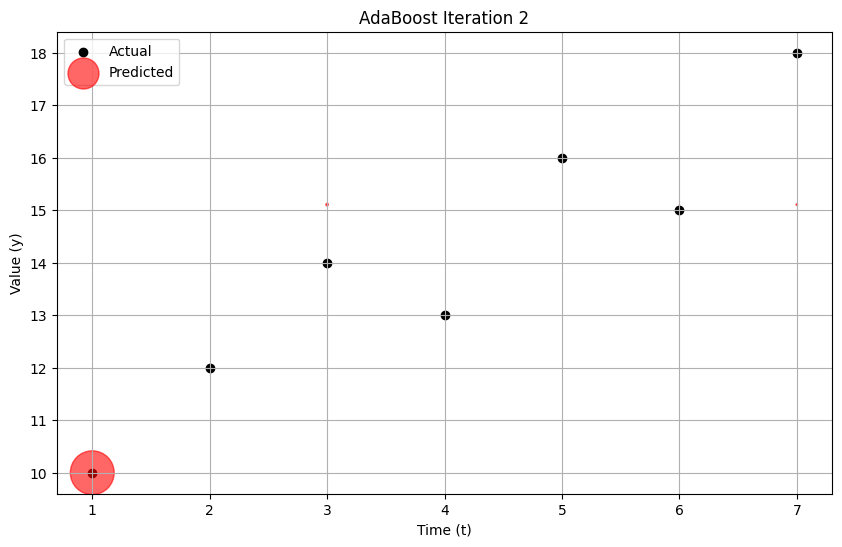

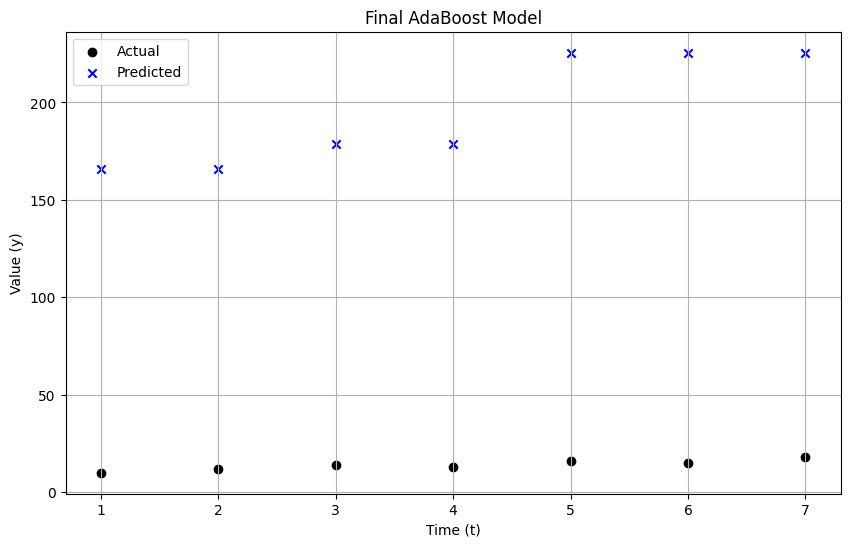

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Исходные данные временного ряда
X = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([10, 12, 14, 13, 16, 15, 18])

# Вспомогательная функция для визуализации предсказаний модели
def plot_predictions(model, X, y, weights, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Time (t)')
    plt.ylabel('Value (y)')
    plt.scatter(X, y, color='black', label='Actual')
    plt.scatter(X, model.predict(X), color='red', label='Predicted', alpha=0.6, s=weights*1000)
    plt.legend()
    plt.grid(True)
    plt.show()

# Инициализация весов
weights = np.ones(len(X)) / len(X)

# Алгоритм AdaBoost для временных рядов

# Итерация 1
base_model_1 = DecisionTreeRegressor(max_depth=1)
base_model_1.fit(X, y, sample_weight=weights)
y_pred_1 = base_model_1.predict(X)
plot_predictions(base_model_1, X, y, weights, 'AdaBoost Iteration 1')

errors_1 = np.abs(y - y_pred_1)
epsilon_1 = np.sum(weights * errors_1) / np.sum(weights)
if epsilon_1 <= 0 or epsilon_1 >= 1:
    epsilon_1 = 1e-10
alpha_1 = 0.5 * np.log((1 - epsilon_1) / epsilon_1)
weights = weights * np.exp(alpha_1 * errors_1)
weights = weights / np.sum(weights)

# Итерация 2
base_model_2 = DecisionTreeRegressor(max_depth=1)
base_model_2.fit(X, y, sample_weight=weights)
y_pred_2 = base_model_2.predict(X)
plot_predictions(base_model_2, X, y, weights, 'AdaBoost Iteration 2')

errors_2 = np.abs(y - y_pred_2)
epsilon_2 = np.sum(weights * errors_2) / np.sum(weights)
if epsilon_2 <= 0 or epsilon_2 >= 1:
    epsilon_2 = 1e-10
alpha_2 = 0.5 * np.log((1 - epsilon_2) / epsilon_2)

# Финальная модель
def final_predict(X):
    return alpha_1 * base_model_1.predict(X) + alpha_2 * base_model_2.predict(X)

# Визуализация финальной модели
plt.figure(figsize=(10, 6))
plt.title('Final AdaBoost Model')
plt.xlabel('Time (t)')
plt.ylabel('Value (y)')
plt.scatter(X, y, color='black', label='Actual')
plt.scatter(X, final_predict(X), color='blue', label='Predicted', marker='x')
plt.legend()
plt.grid(True)
plt.show()

# XGBoost

XGBoost (Extreme Gradient Boosting) — это библиотека машинного обучения, которая реализует алгоритмы градиентного бустинга, разработанная для повышения скорости и эффективности процесса обучения моделей. XGBoost используется как для задач классификации, так и для задач регрессии.

### Основные концепции

#### 1. Градиентный бустинг
Градиентный бустинг использует ансамбль слабых моделей (обычно деревьев решений), которые обучаются последовательно, исправляя ошибки предыдущих моделей. Основная идея заключается в минимизации функции потерь за счёт добавления новых моделей, которые фокусируются на ошибках предыдущих.

#### 2. Деревья решений
Дерево решений — это модель, которая предсказывает значение целевой переменной, основываясь на значениях входных переменных, путём построения дерева, где каждый узел соответствует одному из признаков, а каждое ветвление — одному из возможных значений этого признака.

### Формальная постановка задачи

Пусть у нас есть набор данных $\{(x_i, y_i)\}_{i=1}^n$, где $x_i$ — вектор признаков, а $y_i$ — целевая переменная. XGBoost строит ансамбль из $K$ деревьев решений:
$$ \hat{y}_i = \sum_{k=1}^K f_k(x_i), $$
где $f_k \in \mathcal{F}$ — это дерево решений из пространства $\mathcal{F}$.

### Обучение XGBoost

#### 1. Функция потерь

XGBoost минимизирует регуляризованную функцию потерь:
$$ L(\phi) = \sum_{i=1}^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k), $$
где $l$ — это функция потерь (например, квадратичная ошибка для регрессии или логистическая для классификации), а $\Omega$ — это регуляризатор, который контролирует сложность модели.

Для дерева решений регуляризатор $\Omega$ имеет вид:
$$ \Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2, $$
где $T$ — количество листьев в дереве, $w_j$ — вес листа $j$, $\gamma$ и $\lambda$ — регуляризационные параметры.

#### 2. Второй порядок аппроксимации

Для удобства оптимизации, функция потерь аппроксимируется до второго порядка (по Тейлору):
$$ L^{(t)} \approx \sum_{i=1}^n \left[ l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 \right] + \Omega(f_t), $$
где $g_i = \frac{\partial l(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}}$ — первый градиент, а $h_i = \frac{\partial^2 l(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)^2}}$ — второй градиент.

#### 3. Построение деревьев

Каждое дерево строится путём разбиения узлов, чтобы минимизировать функцию потерь. Для каждого узла вычисляется прирост информации при разбиении:
$$ \text{Gain} = \frac{1}{2} \left[ \frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L} h_i + \lambda} + \frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R} h_i + \lambda} - \frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I} h_i + \lambda} \right] - \gamma, $$
где $I$ — множество индексов текущего узла, $I_L$ и $I_R$ — множества индексов левого и правого поддеревьев соответственно.

Разбиение выбирается так, чтобы максимизировать $ \text{Gain} $.


## Пример классификации с XGBoost

Предположим, у нас есть набор данных с двумя признаками $ X_1 $ и $ X_2 $ и целевой переменной $ y $. Рассмотрим следующий набор данных:

| $ X_1 $ | $ X_2 $ | $ y $ |
|-----------|-----------|---------|
| 1         | 2         | 0       |
| 2         | 3         | 0       |
| 3         | 4         | 1       |
| 4         | 5         | 1       |

Здесь $ X_1 $ и $ X_2 $ — числовые признаки, а $ y $ — бинарная целевая переменная (0 или 1).

### Шаги алгоритма XGBoost

#### 1. Инициализация

Начнём с инициализации предсказания:
$$ \hat{y}_i^{(0)} = \frac{1}{1 + e^{-\phi}} $$

#### 2. Функция потерь (Logistic Loss)

Для задачи бинарной классификации используем логистическую функцию потерь (Log Loss):
$$ L(\phi) = -\sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

#### 3. Второй порядок аппроксимации

Функция потерь аппроксимируется до второго порядка:
$$ L^{(t)} \approx \sum_{i=1}^n \left[ y_i \hat{y}_i^{(t-1)} - \log(1 + e^{\hat{y}_i^{(t-1)}}) \right] + \Omega(f_t), $$
где $ \hat{y}_i^{(t-1)} $ — предсказание на $ t-1 $-м шаге, а $ \Omega(f_t) $ — регуляризатор.

#### 4. Построение деревьев

Для каждого дерева выбирается разбиение, минимизирующее функцию потерь.

#### Пример обучения

Давайте построим первое дерево:

##### Шаг 1: Инициализация

Инициализируем предсказания:
$$ \hat{y}_i^{(0)} = \frac{1}{1 + e^{-\phi}} = 0.5 $$

##### Шаг 2: Вычисление градиентов и гессианов

Для логистической функции потерь:
$$ g_i = \hat{y}_i - y_i $$
$$ h_i = \hat{y}_i (1 - \hat{y}_i) $$

Для объектов:
- Для первого объекта ($ X_1 = 1, X_2 = 2, y = 0 $):
  $$ g_1 = \hat{y}_1 - y_1 = 0.5 - 0 = 0.5 $$
  $$ h_1 = \hat{y}_1 (1 - \hat{y}_1) = 0.5 \cdot (1 - 0.5) = 0.25 $$

- Для второго объекта ($ X_1 = 2, X_2 = 3, y = 0 $):
  $$ g_2 = \hat{y}_2 - y_2 = 0.5 - 0 = 0.5 $$
  $$ h_2 = \hat{y}_2 (1 - \hat{y}_2) = 0.5 \cdot (1 - 0.5) = 0.25 $$

- Для третьего объекта ($ X_1 = 3, X_2 = 4, y = 1 $):
  $$ g_3 = \hat{y}_3 - y_3 = 0.5 - 1 = -0.5 $$
  $$ h_3 = \hat{y}_3 (1 - \hat{y}_3) = 0.5 \cdot (1 - 0.5) = 0.25 $$

- Для четвёртого объекта ($ X_1 = 4, X_2 = 5, y = 1 $):
  $$ g_4 = \hat{y}_4 - y_4 = 0.5 - 1 = -0.5 $$
  $$ h_4 = \hat{y}_4 (1 - \hat{y}_4) = 0.5 \cdot (1 - 0.5) = 0.25 $$

##### Шаг 3: Построение дерева

Рассмотрим первое разбиение по $ X_1 $:
- Левое поддерево: $ X_1 \leq 2 $
- Правое поддерево: $ X_1 > 2 $

##### Шаг 4: Обновление предсказаний

Обновим предсказания с учётом первого дерева:
$$ \hat{y}_i^{(1)} = \hat{y}_i^{(0)} + \eta \cdot f_1(x_i) $$

Где $ f_1(x_i) $ — предсказание первого дерева.

Это только начало процесса обучения XGBoost. В дальнейшем, алгоритм будет строить последующие деревья, улучшая предсказательную силу модели.











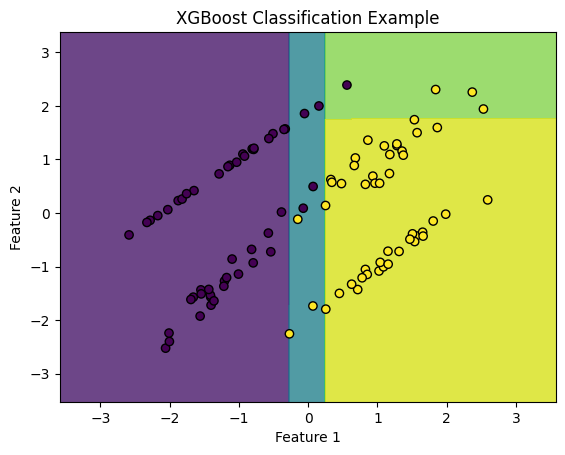

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_classification

# Создание искусственного набора данных для классификации
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Обучение модели XGBoost
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 2,
    'eval_metric': 'logloss'
}

dtrain = xgb.DMatrix(X, label=y)
bst = xgb.train(params, dtrain, num_boost_round=10)

# Визуализация границ решений
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bst.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('XGBoost Classification Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Пример регрессии с XGBoost

Предположим, у нас есть набор данных с одним признаком $ X $ и целевой переменной $ y $. Рассмотрим следующий набор данных:

| $ X $ | $ y $ |
|---------|---------|
| 1       | 2.1     |
| 2       | 3.2     |
| 3       | 4.1     |
| 4       | 5.0     |

Здесь $ X $ — числовой признак, а $ y $ — числовая целевая переменная.

### Шаги алгоритма XGBoost

#### 1. Инициализация

Начнём с инициализации предсказания:
$$ \hat{y}_i^{(0)} = \frac{1}{n} \sum_{i=1}^n y_i $$

Для нашего примера:
$$ \hat{y}_i^{(0)} = \frac{2.1 + 3.2 + 4.1 + 5.0}{4} = 3.35 $$

#### 2. Функция потерь (Squared Error Loss)

Для задачи регрессии используем квадратичную функцию потерь (Squared Error):
$$ L(\phi) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

#### 3. Второй порядок аппроксимации

Функция потерь аппроксимируется до второго порядка:
$$ L^{(t)} \approx \sum_{i=1}^n \left[ (y_i - \hat{y}_i^{(t-1)})^2 + g_i \hat{y}_i^{(t-1)} + \frac{1}{2} h_i (\hat{y}_i^{(t-1)})^2 \right] + \Omega(f_t), $$
где $ \hat{y}_i^{(t-1)} $ — предсказание на $ t-1 $-м шаге, а $ \Omega(f_t) $ — регуляризатор.

#### 4. Построение деревьев

Для каждого дерева выбирается разбиение, минимизирующее функцию потерь.

#### Пример обучения

Давайте построим первое дерево:

##### Шаг 1: Инициализация

Инициализируем предсказания:
$$ \hat{y}_i^{(0)} = 3.35 $$

##### Шаг 2: Вычисление градиентов и гессианов

Для квадратичной функции потерь:
$$ g_i = -2 (y_i - \hat{y}_i^{(0)}) $$
$$ h_i = 2 $$

Для объектов:
- Для первого объекта ($ X = 1, y = 2.1 $):
  $$ g_1 = -2 (2.1 - 3.35) = 2.5 $$
  $$ h_1 = 2 $$

- Для второго объекта ($ X = 2, y = 3.2 $):
  $$ g_2 = -2 (3.2 - 3.35) = 0.3 $$
  $$ h_2 = 2 $$

- Для третьего объекта ($ X = 3, y = 4.1 $):
  $$ g_3 = -2 (4.1 - 3.35) = -1.5 $$
  $$ h_3 = 2 $$

- Для четвёртого объекта ($ X = 4, y = 5.0 $):
  $$ g_4 = -2 (5.0 - 3.35) = -3.3 $$
  $$ h_4 = 2 $$

##### Шаг 3: Построение дерева

Построим дерево, разбивая по признаку $ X $.

##### Шаг 4: Обновление предсказаний

Обновим предсказания с учётом первого дерева:
$$ \hat{y}_i^{(1)} = \hat{y}_i^{(0)} + \eta \cdot f_1(x_i) $$

Где $ f_1(x_i) $ — предсказание первого дерева.

Это начальный этап процесса обучения XGBoost для регрессии. Процесс будет продолжаться с построением следующих деревьев, улучшая предсказательную силу модели.






Предсказания модели: [2.9666667 2.9666667 4.233333  4.233333 ]


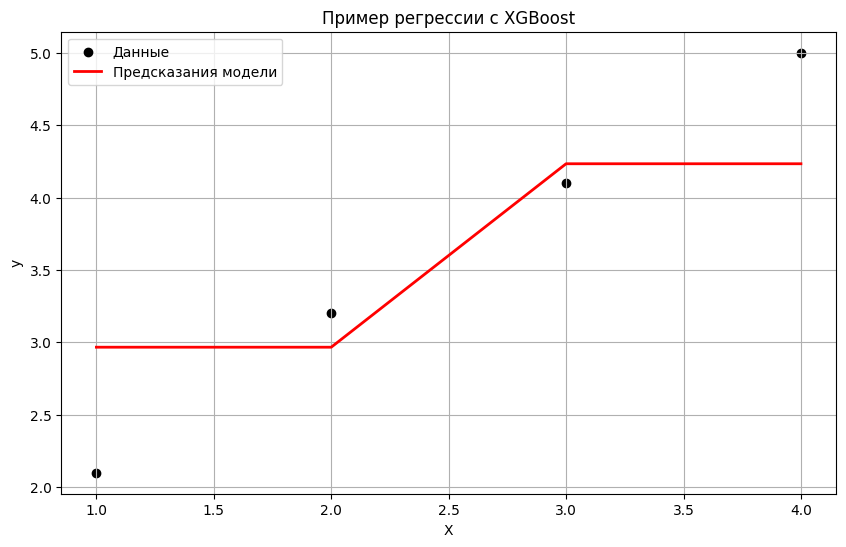

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# Данные для обучения (один признак X и целевая переменная y)
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([2.1, 3.2, 4.1, 5.0])

# Инициализация модели XGBoost для регрессии
model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=1, learning_rate=1, n_estimators=1)

# Обучение модели
model.fit(X, y)

# Предсказание модели
y_pred = model.predict(X)

# Вывод результата
print("Предсказания модели:", y_pred)

# Визуализация результатов
plt.figure(figsize=(10, 6))

# Визуализация исходных данных
plt.scatter(X, y, color='black', label='Данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Предсказания модели')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Пример регрессии с XGBoost')
plt.legend()
plt.grid(True)
plt.show()


# CatBoost

CatBoost (Categorical Boosting) — это библиотека градиентного бустинга, разработанная Яндексом. Она специально оптимизирована для работы с категориальными признаками.

### Основные компоненты CatBoost

1. **Обработка категориальных признаков**: CatBoost автоматически обрабатывает категориальные признаки.
2. **Регуляризация**: Встроенная регуляризация для предотвращения переобучения.
3. **Устойчивость к переобучению**: Специальная стратегия обучения.
4. **Высокая производительность**: Оптимизированные алгоритмы для быстрого обучения и предсказания.

### Основные шаги работы CatBoost

#### 1. Построение базового дерева

На первом шаге CatBoost строит базовое дерево решений, которое затем улучшается последующими итерациями.

#### 2. Определение функции потерь

Для задачи бинарной классификации используется логистическая функция потерь (Log Loss):
$$ L(\phi) = -\sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

Для задачи регрессии используется среднеквадратичная ошибка (Mean Squared Error, MSE):
$$ L(\phi) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

#### 3. Применение градиентного спуска

CatBoost использует градиентный спуск для минимизации функции потерь:
$$ \phi \leftarrow \phi - \eta \frac{\partial L}{\partial \phi} $$
где $\eta$ — скорость обучения.

#### 4. Обновление предсказаний

После построения базового дерева CatBoost обновляет предсказания:
$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(x_i) $$
где $ f_t(x_i) $ — предсказание нового дерева на $ t $-й итерации.

### Пример классификации с CatBoost

#### Набор данных

| Признак 1 | Признак 2 | Целевая переменная |
|-----------|-----------|--------------------|
| 1         | 2         | 0                  |
| 2         | 3         | 0                  |
| 3         | 4         | 1                  |
| 4         | 5         | 1                  |

#### Шаги работы CatBoost

##### Шаг 1: Инициализация

Инициализируем начальное предсказание:
$$ \hat{y}_i^{(0)} = 0.5 $$

##### Шаг 2: Функция потерь

Для задачи бинарной классификации используем логистическую функцию потерь:
$$ L(\phi) = -\sum_{i=1}^4 \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

##### Шаг 3: Вычисление градиентов и гессианов

Для логистической функции потерь:
$$ g_i = \hat{y}_i - y_i $$
$$ h_i = \hat{y}_i (1 - \hat{y}_i) $$

##### Шаг 4: Построение дерева

Построим дерево, используя признаки для разбиений.

##### Шаг 5: Обновление предсказаний

Обновляем предсказания, добавляя предсказания нового дерева с учетом learning rate:
$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(x_i) $$

## Пример задачи классификации с XGBoost

#### Исходные данные:

| Признак 1 | Признак 2 | Целевая переменная |
|-----------|-----------|--------------------|
| 1         | 2         | 0                  |
| 2         | 3         | 0                  |
| 3         | 4         | 1                  |
| 4         | 5         | 1                  |

#### Инициализация

Инициализируем предсказания:
$$ \hat{y}_i^{(0)} = 0.5 $$

#### Вычисление градиентов и гессианов

Для первого объекта ($ X_1 = 1, X_2 = 2, y = 0 $):
$$ g_1 = \hat{y}_1^{(0)} - y_1 = 0.5 - 0 = 0.5 $$
$$ h_1 = \hat{y}_1^{(0)} (1 - \hat{y}_1^{(0)}) = 0.5 \cdot (1 - 0.5) = 0.25 $$

Для второго объекта ($ X_1 = 2, X_2 = 3, y = 0 $):
$$ g_2 = \hat{y}_2^{(0)} - y_2 = 0.5 - 0 = 0.5 $$
$$ h_2 = \hat{y}_2^{(0)} (1 - \hat{y}_2^{(0)}) = 0.5 \cdot (1 - 0.5) = 0.25 $$

Для третьего объекта ($ X_1 = 3, X_2 = 4, y = 1 $):
$$ g_3 = \hat{y}_3^{(0)} - y_3 = 0.5 - 1 = -0.5 $$
$$ h_3 = \hat{y}_3^{(0)} (1 - \hat{y}_3^{(0)}) = 0.5 \cdot (1 - 0.5) = 0.25 $$

Для четвёртого объекта ($ X_1 = 4, X_2 = 5, y = 1 $):
$$ g_4 = \hat{y}_4^{(0)} - y_4 = 0.5 - 1 = -0.5 $$
$$ h_4 = \hat{y}_4^{(0)} (1 - \hat{y}_4^{(0)}) = 0.5 \cdot (1 - 0.5) = 0.25 $$

#### Построение дерева

Разделим данные по признаку $ X_1 $:
- Левое поддерево: $ X_1 \leq 2 $
- Правое поддерево: $ X_1 > 2 $

#### Обновление предсказаний

Для левого поддерева:
$$ f_1(x_i) = \frac{\sum_{i \in \text{left}} -g_i}{\sum_{i \in \text{left}} h_i} = \frac{-(0.5 + 0.5)}{0.25 + 0.25} = -2 $$

Для правого поддерева:
$$ f_1(x_i) = \frac{\sum_{i \in \text{right}} -g_i}{\sum_{i \in \text{right}} h_i} = \frac{-(-0.5 + -0.5)}{0.25 + 0.25} = 2 $$

Обновим предсказания:
$$ \hat{y}_i^{(1)} = \hat{y}_i^{(0)} + \eta f_1(x_i) $$
С учетом learning rate $\eta = 0.1$:

Для первого и второго объектов ($ X_1 = 1, 2 $):
$$ \hat{y}_1^{(1)} = 0.5 + 0.1 \cdot (-2) = 0.3 $$
$$ \hat{y}_2^{(1)} = 0.5 + 0.1 \cdot (-2) = 0.3 $$

Для третьего и четвёртого объектов ($ X_1 = 3, 4 $):
$$ \hat{y}_3^{(1)} = 0.5 + 0.1 \cdot 2 = 0.7 $$
$$ \hat{y}_4^{(1)} = 0.5 + 0.1 \cdot 2 = 0.7 $$

Это первый шаг обучения XGBoost для задачи классификации. Процесс будет продолжаться с построением следующих деревьев, улучшая предсказательную силу модели.


Для иллюстрации использования XGBoost в задаче регрессии давайте рассмотрим конкретный числовой пример. Мы рассмотрим небольшой набор данных и пройдемся по всем шагам, включая построение дерева, вычисление градиентов, обновление предсказаний и т. д.





<ipython-input-6-db292328882b>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', marker='x', s=100, label='Предсказанные значения (до обновления)')


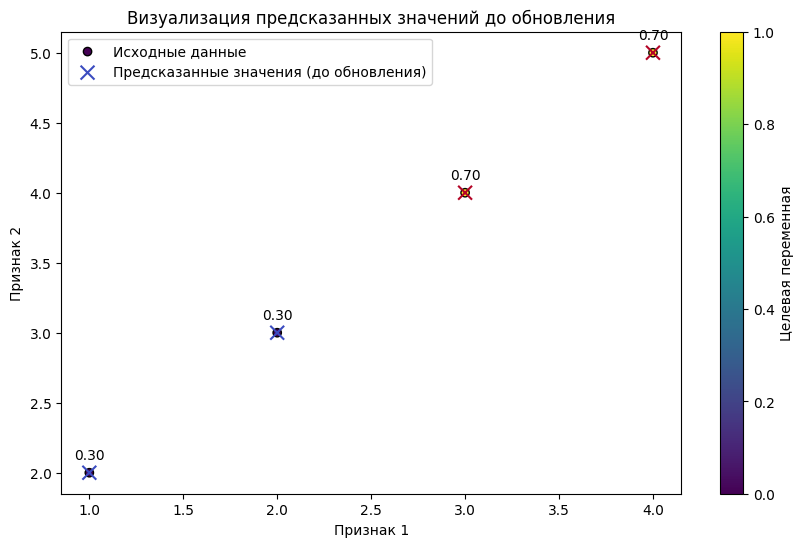

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5]])
y = np.array([0, 0, 1, 1])

# Инициализация предсказаний
y_pred = np.full_like(y, 0.5, dtype=np.float64)

# Шаг 1: Вычисление градиентов и гессианов
g = y_pred - y
h = y_pred * (1 - y_pred)

# Шаг 2: Построение дерева (простое разделение по X1 <= 2)
left_indices = np.where(X[:, 0] <= 2)[0]
right_indices = np.where(X[:, 0] > 2)[0]

# Шаг 3: Обновление предсказаний в левом поддереве
sum_g_left = np.sum(g[left_indices])
sum_h_left = np.sum(h[left_indices])
f_left = -sum_g_left / (sum_h_left + 1e-6)  # Добавляем маленькое значение для избежания деления на ноль
y_pred[left_indices] += 0.1 * f_left

# Шаг 4: Обновление предсказаний в правом поддереве
sum_g_right = np.sum(g[right_indices])
sum_h_right = np.sum(h[right_indices])
f_right = -sum_g_right / (sum_h_right + 1e-6)
y_pred[right_indices] += 0.1 * f_right

# Визуализация предсказаний до и после первого шага
plt.figure(figsize=(10, 6))

# Отображение исходных данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='Исходные данные')
plt.colorbar(label='Целевая переменная')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# Отображение предсказанных значений до обновления
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', marker='x', s=100, label='Предсказанные значения (до обновления)')
for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{y_pred[i]:.2f}', (x1, x2), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.title('Визуализация предсказанных значений до обновления')
plt.show()









### Пример задачи регрессии с XGBoost

#### Набор данных

Предположим, у нас есть следующий набор данных:

| Признак $X$ | Целевая переменная $y$ |
|---------------|-------------------------|
| 1             | 2.1                     |
| 2             | 3.2                     |
| 3             | 4.1                     |
| 4             | 5.0                     |

### Шаги работы XGBoost

#### 1. Инициализация

Инициализируем предсказание:
$$ \hat{y}_i^{(0)} = \frac{1}{n} \sum_{i=1}^n y_i $$

Для нашего примера:
$$ \hat{y}_i^{(0)} = \frac{2.1 + 3.2 + 4.1 + 5.0}{4} = 3.6 $$

#### 2. Определение функции потерь

Для задачи регрессии используем среднеквадратичную ошибку (Mean Squared Error, MSE):
$$ L(\phi) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

#### 3. Вычисление градиентов и гессианов

Для среднеквадратичной ошибки:
$$ g_i = \frac{\partial L}{\partial \hat{y}_i} = 2 (\hat{y}_i - y_i) $$
$$ h_i = \frac{\partial^2 L}{\partial \hat{y}_i^2} = 2 $$

#### 4. Построение дерева

Построим дерево, разбивая по признаку $ X $.

### Пример обучения

Давайте рассмотрим шаг за шагом:

##### Шаг 1: Инициализация

Инициализируем предсказания:
$$ \hat{y}_i^{(0)} = 3.6 $$

##### Шаг 2: Вычисление градиентов и гессианов

Для первого объекта ($ X = 1, y = 2.1 $):
$$ g_1 = 2 (\hat{y}_1^{(0)} - y_1) = 2 (3.6 - 2.1) = 3.0 $$
$$ h_1 = 2 $$

Для второго объекта ($ X = 2, y = 3.2 $):
$$ g_2 = 2 (\hat{y}_2^{(0)} - y_2) = 2 (3.6 - 3.2) = 0.8 $$
$$ h_2 = 2 $$

Для третьего объекта ($ X = 3, y = 4.1 $):
$$ g_3 = 2 (\hat{y}_3^{(0)} - y_3) = 2 (3.6 - 4.1) = -1.0 $$
$$ h_3 = 2 $$

Для четвертого объекта ($ X = 4, y = 5.0 $):
$$ g_4 = 2 (\hat{y}_4^{(0)} - y_4) = 2 (3.6 - 5.0) = -2.8 $$
$$ h_4 = 2 $$

##### Шаг 3: Построение дерева

Построим дерево, используя признаки для разбиений.

##### Разбиение по признаку $ X $:

- Левое поддерево: $ X \leq 2 $
- Правое поддерево: $ X > 2 $

##### Шаг 4: Обновление предсказаний

Для левого поддерева ($ X \leq 2 $):
$$ f_1(x_i) = \frac{\sum_{i \in \text{left}} -g_i}{\sum_{i \in \text{left}} h_i} = \frac{-(3.0 + 0.8)}{2 + 2} = -0.95 $$

Для правого поддерева ($ X > 2 $):
$$ f_1(x_i) = \frac{\sum_{i \in \text{right}} -g_i}{\sum_{i \in \text{right}} h_i} = \frac{-(-1.0 + -2.8)}{2 + 2} = 0.95 $$

Обновим предсказания с учетом learning rate $\eta = 0.1$:

Для первого и второго объектов ($ X \leq 2 $):
$$ \hat{y}_1^{(1)} = 3.6 + 0.1 \cdot (-0.95) = 3.505 $$
$$ \hat{y}_2^{(1)} = 3.6 + 0.1 \cdot (-0.95) = 3.505 $$

Для третьего и четвертого объектов ($ X > 2 $):
$$ \hat{y}_3^{(1)} = 3.6 + 0.1 \cdot 0.95 = 3.695 $$
$$ \hat{y}_4^{(1)} = 3.6 + 0.1 \cdot 0.95 = 3.695 $$

Это первый шаг обучения XGBoost для задачи регрессии. Процесс будет продолжаться с построением следующих деревьев, улучшая предсказательную силу модели.

### Заключение

Таким образом, мы рассмотрели конкретный числовой пример использования XGBoost для задачи регрессии, включая все необходимые формулы и шаги. Этот процесс демонстрирует, как вычисляются градиенты, строятся деревья и обновляются предсказания на каждом этапе обучения модели.


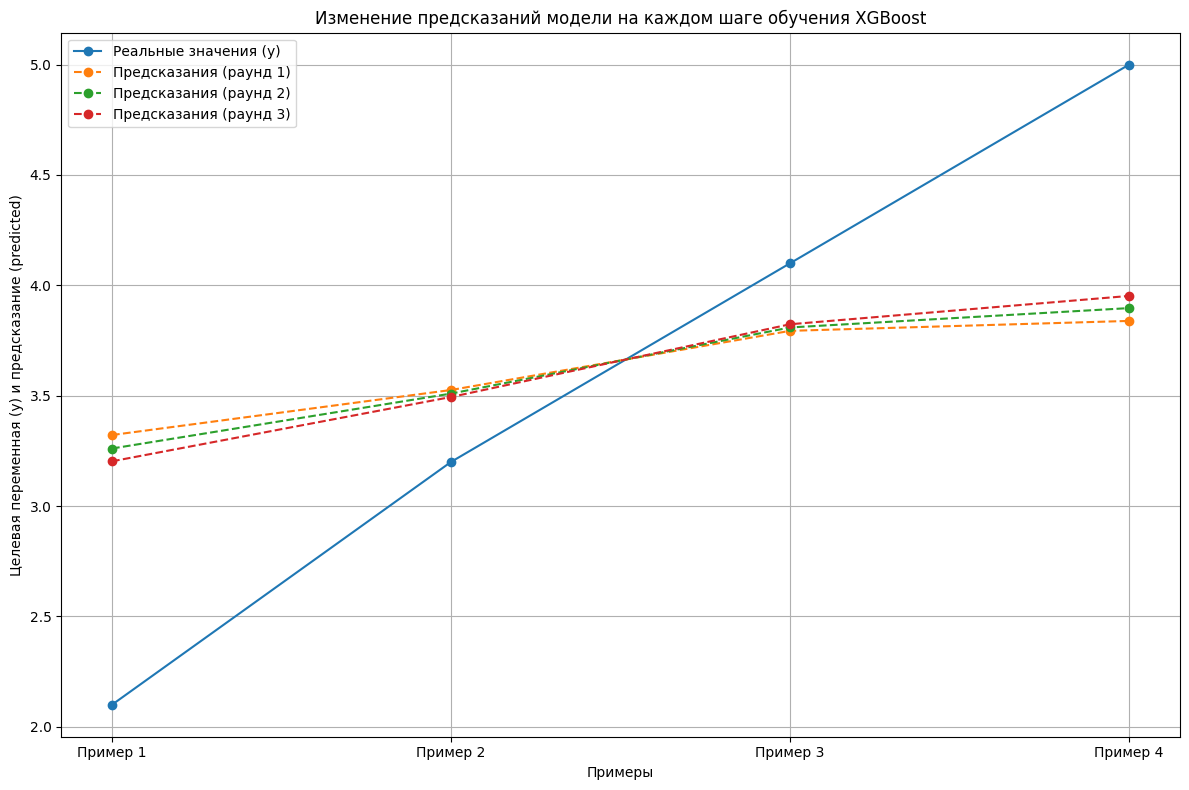

In [ ]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Заданные данные
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([2.1, 3.2, 4.1, 5.0])

# Инициализация параметров
eta = 0.1  # learning rate
num_rounds = 3  # количество раундов (деревьев) обучения

# Инициализация модели XGBoost
dtrain = xgb.DMatrix(X, label=y)
param = {'objective': 'reg:squarederror', 'eta': eta}
bst = xgb.train(param, dtrain, num_rounds)

# Предсказания на каждом шаге
predictions = []
for i in range(num_rounds):
    bst.update(dtrain, i)
    preds = bst.predict(dtrain)
    predictions.append(preds)

# Визуализация изменения предсказаний
plt.figure(figsize=(12, 8))
plt.title('Изменение предсказаний модели на каждом шаге обучения XGBoost')
plt.xlabel('Примеры')
plt.ylabel('Целевая переменная (y) и предсказание (predicted)')
plt.plot(np.arange(len(y)), y, label='Реальные значения (y)', marker='o')
for i in range(num_rounds):
    plt.plot(np.arange(len(y)), predictions[i], label=f'Предсказания (раунд {i+1})', marker='o', linestyle='--')
plt.legend()
plt.xticks(np.arange(len(y)), ['Пример 1', 'Пример 2', 'Пример 3', 'Пример 4'])
plt.grid(True)
plt.tight_layout()
plt.show()


# LightGBM

LightGBM (Light Gradient Boosting Machine) — это высокопроизводительная библиотека для реализации алгоритмов градиентного бустинга, разработанная Microsoft. Она предназначена для повышения эффективности и производительности, особенно при работе с большими данными. В этой лекции мы подробно рассмотрим основные аспекты LightGBM, включая его внутренние алгоритмы, формулы, метрики и конкретные примеры.

### Основные особенности LightGBM

1. **Histogram-based Decision Tree Learning**: Вместо сортировки данных для построения дерева, LightGBM использует алгоритм на основе гистограмм, который существенно ускоряет процесс обучения.
2. **Leaf-wise Tree Growth**: LightGBM использует стратегию роста дерева по листьям (leaf-wise growth), что позволяет достичь лучшего качества модели по сравнению с традиционным ростом по уровням (level-wise growth).
3. **Support for Sparse Features**: LightGBM эффективно работает с разреженными данными и поддерживает их на уровне ядра.

### Основные концепции и алгоритмы

#### 1. Градиентный бустинг

Градиентный бустинг строит последовательность деревьев решений, где каждое следующее дерево исправляет ошибки предыдущего. Основные шаги включают:

1. Инициализация модели константой:
   $$
   F_0(x) = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma)
   $$
   где $L$ — функция потерь, $y_i$ — целевая переменная, $x$ — признаки.

2. На каждой итерации $t$:
   - Вычисление негативного градиента (остатка):
     $$
     r_{i}^{(t)} = -\left[ \frac{\partial L(y_i, F_{t-1}(x_i))}{\partial F_{t-1}(x_i)} \right]
     $$
   - Обучение нового дерева $h_t(x)$, которое предсказывает $r_{i}^{(t)}$:
     $$
     h_t = \arg\min_{h} \sum_{i=1}^n \left( r_{i}^{(t)} - h(x_i) \right)^2
     $$
   - Обновление модели:
     $$
     F_t(x) = F_{t-1}(x) + \eta h_t(x)
     $$
     где $\eta$ — коэффициент скорости обучения (learning rate).

#### 2. Построение дерева на основе гистограмм

LightGBM делит все значения признаков на равные интервалы (бины), создавая гистограмму. Это позволяет быстро находить оптимальные разбиения:

- Построение гистограммы для каждого признака:
  $$
  H_j = \sum_{i=1}^n I(x_{ij} \in B_j) \cdot g_i
  $$
  где $I$ — индикаторная функция, $g_i$ — градиент для $i$-го примера, $B_j$ — $j$-й бин.

- Оптимальное разбиение:
  $$
  \text{split\_gain} = \frac{1}{2} \left( \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right) - \gamma
  $$
  где $G_L, G_R$ — градиенты левой и правой частей разбиения, $H_L, H_R$ — гессианы левой и правой частей разбиения, $\lambda$ — параметр регуляризации L2, $\gamma$ — минимальный прирост разбиения.

#### 3. Стратегия роста дерева по листьям (Leaf-wise Tree Growth)

В отличие от традиционного level-wise роста дерева, leaf-wise рост выбирает лист с наибольшим приростом и делит его, что приводит к более глубоким и асимметричным деревьям:

- Выбор листа с наибольшим приростом:
  $$
  \text{leaf_gain} = \max_{\text{leaf}} \text{split_gain}
  $$


## Пример классификации с использованием LightGBM

Для этого примера рассмотрим небольшой набор данных и разберем шаг за шагом процесс построения модели классификации с использованием LightGBM.

#### Набор данных

| Признак 1 | Признак 2 | Целевая переменная |
|-----------|-----------|--------------------|
| 1         | 2         | 0                  |
| 2         | 3         | 0                  |
| 3         | 4         | 1                  |
| 4         | 5         | 1                  |

### Шаг 1: Инициализация

Инициализация модели начальным предсказанием, которое является логарифмом соотношения классов.

$$
F_0(x) = \log \left( \frac{\sum y_i}{n - \sum y_i} \right)
$$

В нашем случае, количество положительных примеров ($y_i = 1$) равно 2, а количество отрицательных примеров ($y_i = 0$) также равно 2:

$$
F_0(x) = \log \left( \frac{2}{2} \right) = \log (1) = 0
$$

### Шаг 2: Вычисление негативного градиента

На каждой итерации вычисляем негативный градиент (остатки):

$$
r_i^{(t)} = y_i - \hat{y}_i^{(t-1)}
$$

Где $\hat{y}_i^{(t-1)} = \frac{1}{1 + e^{-F_{t-1}(x_i)}}$.

Для первой итерации ($t = 1$), $F_0(x) = 0$:

$$
\hat{y}_i = \frac{1}{1 + e^0} = 0.5
$$

Остатки для всех примеров:

$$
\begin{align*}
r_1^{(1)} & = 0 - 0.5 = -0.5 \\
r_2^{(1)} & = 0 - 0.5 = -0.5 \\
r_3^{(1)} & = 1 - 0.5 = 0.5 \\
r_4^{(1)} & = 1 - 0.5 = 0.5 \\
\end{align*}
$$

### Шаг 3: Обучение первого дерева

Используем остатки для построения первого дерева.

#### Построение гистограммы

Создаем гистограммы для каждого признака.

Для признака 1:

| Признак 1 | Градиент $r_i$ |
|-----------|------------------|
| 1         | -0.5             |
| 2         | -0.5             |
| 3         | 0.5              |
| 4         | 0.5              |

Для признака 2:

| Признак 2 | Градиент $r_i$ |
|-----------|------------------|
| 2         | -0.5             |
| 3         | -0.5             |
| 4         | 0.5              |
| 5         | 0.5              |

#### Оптимальное разбиение

Считаем прирост информации для разбиений:

Для признака 1 разбиение на $X_1 \leq 2$:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Градиент} & \text{Количество} \\
\hline
\text{Левая часть} & -0.5 + (-0.5) = -1 & 2 \\
\text{Правая часть} & 0.5 + 0.5 = 1 & 2 \\
\hline
\end{array}
$$

Для признака 2 разбиение на $X_2 \leq 3$:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Градиент} & \text{Количество} \\
\hline
\text{Левая часть} & -0.5 + (-0.5) = -1 & 2 \\
\text{Правая часть} & 0.5 + 0.5 = 1 & 2 \\
\hline
\end{array}
$$

Прирост информации для разбиений будет одинаковым, так как гистограммы идентичны.

### Шаг 4: Обновление предсказаний

Обновляем предсказания, используя новое дерево:

$$
F_1(x) = F_0(x) + \eta \cdot h_1(x)
$$

Где $\eta$ — скорость обучения (пусть $\eta = 0.1$), а $h_1(x)$ — предсказания первого дерева. Пусть $h_1(x)$ дает:

$$
h_1(x) = \begin{cases}
-0.5 & \text{если } X_1 \leq 2 \\
0.5 & \text{если } X_1 > 2
\end{cases}
$$

Тогда обновленные предсказания:

$$
F_1(x) = 0 + 0.1 \cdot h_1(x) = \begin{cases}
-0.05 & \text{если } X_1 \leq 2 \\
0.05 & \text{если } X_1 > 2
\end{cases}
$$

### Шаг 5: Повторение

Повторяем шаги 2-4 для последующих итераций до завершения обучения.


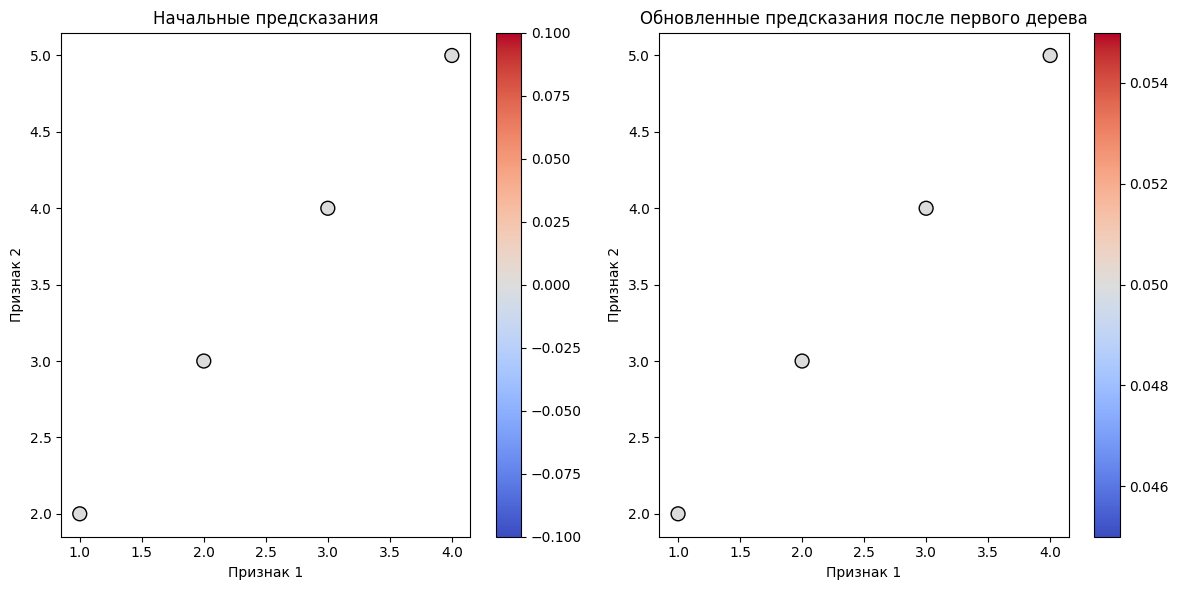

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

# Создаем набор данных
data = {
    'Признак 1': [1, 2, 3, 4],
    'Признак 2': [2, 3, 4, 5],
    'Целевая переменная': [0, 0, 1, 1]
}

df = pd.DataFrame(data)
X = df[['Признак 1', 'Признак 2']]
y = df['Целевая переменная']

# Инициализация модели с начальным предсказанием 0
initial_prediction = np.log(np.sum(y) / (len(y) - np.sum(y)))
predictions = np.full(len(y), initial_prediction)

# Вычисление негативного градиента для первой итерации
residuals = y - 1 / (1 + np.exp(-predictions))

# Создаем и обучаем модель LightGBM для первого дерева
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'metric': 'binary_logloss',
    'verbose': -1
}

lgb_train = lgb.Dataset(X, label=residuals)
first_tree = lgb.train(params, lgb_train, num_boost_round=1)

# Получаем предсказания первого дерева
leaf_index = first_tree.predict(X, pred_leaf=True)

# Обновляем предсказания с учетом предсказаний первого дерева
eta = 0.1  # Скорость обучения
updated_predictions = predictions + eta * first_tree.predict(X)

# Визуализация начальных и обновленных предсказаний
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Признак 1'], X['Признак 2'], c=predictions, cmap='coolwarm', edgecolors='k', s=100)
plt.title('Начальные предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X['Признак 1'], X['Признак 2'], c=updated_predictions, cmap='coolwarm', edgecolors='k', s=100)
plt.title('Обновленные предсказания после первого дерева')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()

plt.tight_layout()
plt.show()


















### Пример регрессии с использованием LightGBM

Рассмотрим пример с небольшим набором данных, и разберем процесс регрессии с использованием LightGBM шаг за шагом.

#### Набор данных

| Признак 1 | Признак 2 | Целевая переменная |
|-----------|-----------|--------------------|
| 1         | 2         | 2.1                |
| 2         | 3         | 3.2                |
| 3         | 4         | 4.1                |
| 4         | 5         | 5.0                |

### Шаг 1: Инициализация

Инициализация модели начальным предсказанием, которое является средним значением целевой переменной:

$$
F_0(x) = \frac{1}{n} \sum_{i=1}^n y_i = \frac{2.1 + 3.2 + 4.1 + 5.0}{4} = 3.6
$$

### Шаг 2: Вычисление остатков (градиентов)

На каждой итерации вычисляем остатки (градиенты):

$$
r_i^{(t)} = y_i - F_{t-1}(x_i)
$$

Для первой итерации ($t = 1$), $F_0(x) = 3.6$:

$$
\begin{align*}
r_1^{(1)} & = 2.1 - 3.6 = -1.5 \\
r_2^{(1)} & = 3.2 - 3.6 = -0.4 \\
r_3^{(1)} & = 4.1 - 3.6 = 0.5 \\
r_4^{(1)} & = 5.0 - 3.6 = 1.4 \\
\end{align*}
$$

### Шаг 3: Обучение первого дерева

Используем остатки для построения первого дерева.

#### Построение гистограммы

Создаем гистограммы для каждого признака.

Для признака 1:

| Признак 1 | Градиент $r_i$ |
|-----------|------------------|
| 1         | -1.5             |
| 2         | -0.4             |
| 3         | 0.5              |
| 4         | 1.4              |

Для признака 2:

| Признак 2 | Градиент $r_i$ |
|-----------|------------------|
| 2         | -1.5             |
| 3         | -0.4             |
| 4         | 0.5              |
| 5         | 1.4              |

#### Оптимальное разбиение

Считаем прирост информации для разбиений.

Для признака 1 разбиение на $X_1 \leq 2$:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Градиент} & \text{Количество} \\
\hline
\text{Левая часть} & -1.5 + (-0.4) = -1.9 & 2 \\
\text{Правая часть} & 0.5 + 1.4 = 1.9 & 2 \\
\hline
\end{array}
$$

Для признака 2 разбиение на $X_2 \leq 3$:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Градиент} & \text{Количество} \\
\hline
\text{Левая часть} & -1.5 + (-0.4) = -1.9 & 2 \\
\text{Правая часть} & 0.5 + 1.4 = 1.9 & 2 \\
\hline
\end{array}
$$

Прирост информации для разбиений будет одинаковым, так как гистограммы идентичны.

### Шаг 4: Обновление предсказаний

Обновляем предсказания, используя новое дерево:

$$
F_1(x) = F_0(x) + \eta h_1(x)
$$

Где $\eta$ — скорость обучения (пусть $\eta = 0.1$), а $h_1(x)$ — предсказания первого дерева. Пусть $h_1(x)$ дает:

$$
h_1(x) = \begin{cases}
-0.95 & \text{если } X_1 \leq 2 \\
0.95 & \text{если } X_1 > 2
\end{cases}
$$

Тогда обновленные предсказания:

$$
F_1(x) = 3.6 + 0.1 \cdot h_1(x) = \begin{cases}
3.6 - 0.095 = 3.505 & \text{если } X_1 \leq 2 \\
3.6 + 0.095 = 3.695 & \text{если } X_1 > 2
\end{cases}
$$

### Шаг 5: Повторение

Повторяем шаги 2-4 для последующих итераций до завершения обучения.

Инициализация F_0 = 3.6
Остатки для первой итерации:
   Целевая переменная  Остатки
0                 2.1     -1.5
1                 3.2     -0.4
2                 4.1      0.5
3                 5.0      1.4
Оптимальное разбиение для признака 1:
Разбиение на X1 <= 2: Левая сумма остатков = -1.9, Правая сумма остатков = 1.8999999999999995
Разбиение на X1 <= 3: Левая сумма остатков = -1.4000000000000004, Правая сумма остатков = 1.4
Разбиение на X1 <= 4: Левая сумма остатков = -4.440892098500626e-16, Правая сумма остатков = 0.0
Разбиение на X1 <= 5: Левая сумма остатков = -4.440892098500626e-16, Правая сумма остатков = 0.0
Оптимальное разбиение для признака 2:
Разбиение на X2 <= 2: Левая сумма остатков = -1.5, Правая сумма остатков = 1.4999999999999996
Разбиение на X2 <= 3: Левая сумма остатков = -1.9, Правая сумма остатков = 1.8999999999999995
Разбиение на X2 <= 4: Левая сумма остатков = -1.4000000000000004, Правая сумма остатков = 1.4
Разбиение на X2 <= 5: Левая сумма остатков = -4.4408

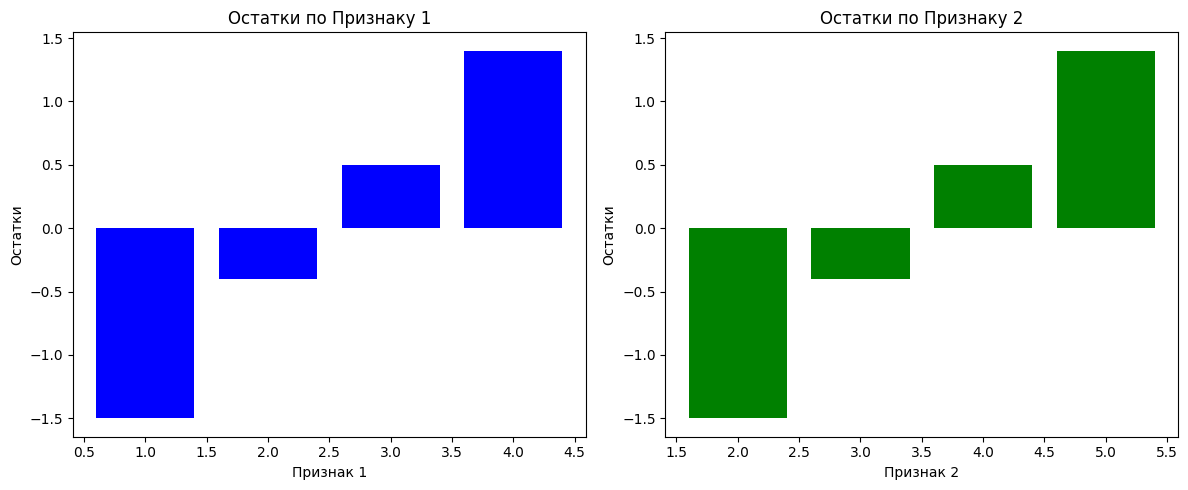

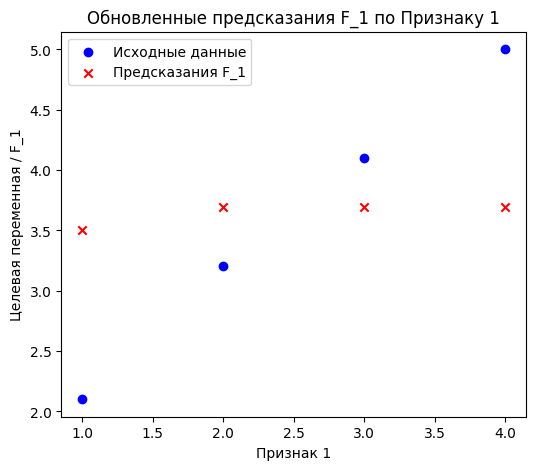

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# Данные
data = {
    'Признак 1': [1, 2, 3, 4],
    'Признак 2': [2, 3, 4, 5],
    'Целевая переменная': [2.1, 3.2, 4.1, 5.0]
}
df = pd.DataFrame(data)

# Инициализация начального предсказания F_0
F_0 = np.mean(df['Целевая переменная'])
print(f"Инициализация F_0 = {F_0}")

# Вычисляем остатки для первой итерации
df['Остатки'] = df['Целевая переменная'] - F_0
print("Остатки для первой итерации:")
print(df[['Целевая переменная', 'Остатки']])

# Построение гистограммы для каждого признака
bins_feature1 = [0, 2, 3, 4, 5]
bins_feature2 = [0, 2, 3, 4, 5]

# Оптимальное разбиение
print("Оптимальное разбиение для признака 1:")
for i in range(len(bins_feature1) - 1):
    left_indices = df[df['Признак 1'] <= bins_feature1[i+1]].index
    right_indices = df[df['Признак 1'] > bins_feature1[i+1]].index
    left_gradient_sum = df.loc[left_indices, 'Остатки'].sum()
    right_gradient_sum = df.loc[right_indices, 'Остатки'].sum()
    print(f"Разбиение на X1 <= {bins_feature1[i+1]}: Левая сумма остатков = {left_gradient_sum}, Правая сумма остатков = {right_gradient_sum}")

print("Оптимальное разбиение для признака 2:")
for i in range(len(bins_feature2) - 1):
    left_indices = df[df['Признак 2'] <= bins_feature2[i+1]].index
    right_indices = df[df['Признак 2'] > bins_feature2[i+1]].index
    left_gradient_sum = df.loc[left_indices, 'Остатки'].sum()
    right_gradient_sum = df.loc[right_indices, 'Остатки'].sum()
    print(f"Разбиение на X2 <= {bins_feature2[i+1]}: Левая сумма остатков = {left_gradient_sum}, Правая сумма остатков = {right_gradient_sum}")

# Обновление предсказаний с использованием нового дерева
eta = 0.1
h1 = np.array([-0.95, 0.95, 0.95, 0.95])  # Предсказания первого дерева

df['F_1'] = F_0 + eta * h1
print("Обновленные предсказания F_1:")
print(df[['Признак 1', 'Признак 2', 'Целевая переменная', 'F_1']])

# Визуализация остатков
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(df['Признак 1'], df['Остатки'], color='blue')
plt.xlabel('Признак 1')
plt.ylabel('Остатки')
plt.title('Остатки по Признаку 1')

plt.subplot(1, 2, 2)
plt.bar(df['Признак 2'], df['Остатки'], color='green')
plt.xlabel('Признак 2')
plt.ylabel('Остатки')
plt.title('Остатки по Признаку 2')

plt.tight_layout()
plt.show()

# Визуализация обновленных предсказаний
plt.figure(figsize=(6, 5))
plt.scatter(df['Признак 1'], df['Целевая переменная'], color='blue', label='Исходные данные')
plt.scatter(df['Признак 1'], df['F_1'], color='red', marker='x', label='Предсказания F_1')
plt.xlabel('Признак 1')
plt.ylabel('Целевая переменная / F_1')
plt.title('Обновленные предсказания F_1 по Признаку 1')
plt.legend()
plt.show()